In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Reading data 

In [2]:
df = pd.read_csv('metrics.csv')

In [4]:
df.shape

(66, 84)

In [3]:
df.head(10)

,id,repo_fullname,commits_count,commits_days_since_first,commits_days_since_last,commits_total_lines_added,commits_total_lines_removed,commits_avg_added,commits_avg_removed,commits_avg_files_changed,...,stars_max_per_day,wf_count,wf_avg_duration,wf_avg_success_duration,wf_avg_failure_duration,wf_avg_successes_per_day,wf_avg_successes_per_day_real,wf_avg_fails_per_day,created_at,updated_at
0,10,MicrosoftDocs/office-developer-infopath-extern...,11.0,1325.0,239.0,93999.0,59.0,8545.0,5.0,28.0,...,1,0,0.0,0.0,0.0,0,0,0,2022-03-05 12:01:07.002908,2022-03-05 12:01:07.002908
1,11,nuvention-web/BarLift,48.0,2605.0,2461.0,85480.0,6858.0,1781.0,143.0,6.0,...,0,0,0.0,0.0,0.0,0,0,0,2022-03-05 12:01:42.607889,2022-03-05 12:01:42.607889
2,12,spacetelescope/VO-Directory,88.0,2608.0,848.0,1209829.0,14268.0,13748.0,162.0,9.0,...,1,0,0.0,0.0,0.0,0,0,0,2022-03-05 12:02:40.902472,2022-03-05 12:02:40.902472
3,13,microsoft/sarif-azuredevops-extension,100.0,1151.0,470.0,6284.0,5896.0,63.0,59.0,2.0,...,1,0,0.0,0.0,0.0,0,0,0,2022-03-05 12:03:41.029087,2022-03-05 12:03:41.029087
4,14,PredixDev/ext-interface,42.0,1858.0,1086.0,10287.0,838.0,245.0,20.0,9.0,...,1,0,0.0,0.0,0.0,0,0,0,2022-03-05 12:23:24.61654,2022-03-05 12:23:24.61654
5,15,Vizzuality/tweets_nba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0.0,0.0,0.0,0,0,0,2022-03-05 12:23:32.075075,2022-03-05 12:23:32.075075
6,16,Azure-Samples/network-dotnet-manage-internet-f...,34.0,1977.0,411.0,58920.0,20822.0,1733.0,612.0,6.0,...,0,0,0.0,0.0,0.0,0,0,0,2022-03-05 12:47:51.05934,2022-03-05 12:47:51.05934
7,17,robertotorfe/camada6_roberto,12.0,271.0,245.0,124.0,83.0,10.0,7.0,4.0,...,2,0,0.0,0.0,0.0,0,0,0,2022-03-05 12:48:05.889198,2022-03-05 12:48:05.889198
8,18,icube-mage/m2-opensource233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0.0,0.0,0.0,0,0,0,2022-03-05 12:48:17.97595,2022-03-05 12:48:17.97595
9,19,microsoft/powerquery-parser,335.0,1076.0,2.0,186703.0,95289.0,557.0,284.0,12.0,...,4,0,0.0,0.0,0.0,0,0,0,2022-03-05 12:55:42.008884,2022-03-05 12:55:42.008884


# Removing Nan values

In [4]:
imputer = SimpleImputer(strategy = 'constant', fill_value = 0)
repo_fullname=df['repo_fullname']
df = df.drop(['repo_fullname','created_at','updated_at','id'], axis=1)

In [5]:
df

,commits_count,commits_days_since_first,commits_days_since_last,commits_total_lines_added,commits_total_lines_removed,commits_avg_added,commits_avg_removed,commits_avg_files_changed,commits_avg_message_length,commits_avg_per_day,...,stars_count,stars_avg_per_day_real,stars_max_per_day,wf_count,wf_avg_duration,wf_avg_success_duration,wf_avg_failure_duration,wf_avg_successes_per_day,wf_avg_successes_per_day_real,wf_avg_fails_per_day
0,11.0,1325.0,239.0,93999.0,59.0,8545.0,5.0,28.0,46.0,NaN,...,2,1,1,0,0.0,0.0,0.0,0,0,0
1,48.0,2605.0,2461.0,85480.0,6858.0,1781.0,143.0,6.0,25.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0,0,0
2,88.0,2608.0,848.0,1209829.0,14268.0,13748.0,162.0,9.0,86.0,NaN,...,2,1,1,0,0.0,0.0,0.0,0,0,0
3,100.0,1151.0,470.0,6284.0,5896.0,63.0,59.0,2.0,25.0,NaN,...,7,1,1,0,0.0,0.0,0.0,0,0,0
4,42.0,1858.0,1086.0,10287.0,838.0,245.0,20.0,9.0,14.0,NaN,...,2,1,1,0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,86.0,3678.0,2154.0,1118.0,435.0,13.0,5.0,1.0,166.0,NaN,...,3,1,1,0,0.0,0.0,0.0,0,0,0
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,0,0.0,0.0,0.0,0,0,0
63,18.0,254.0,247.0,11623.0,421.0,646.0,23.0,20.0,34.0,NaN,...,10,1,3,0,0.0,0.0,0.0,0,0,0
64,86.0,1223.0,1218.0,28205.0,58.0,328.0,1.0,2.0,13.0,NaN,...,4,1,1,0,0.0,0.0,0.0,0,0,0


In [6]:
imputer.fit(df)

df = pd.DataFrame(imputer.transform(df), columns=df.columns)



In [7]:
df


,commits_count,commits_days_since_first,commits_days_since_last,commits_total_lines_added,commits_total_lines_removed,commits_avg_added,commits_avg_removed,commits_avg_files_changed,commits_avg_message_length,commits_avg_per_day,...,stars_count,stars_avg_per_day_real,stars_max_per_day,wf_count,wf_avg_duration,wf_avg_success_duration,wf_avg_failure_duration,wf_avg_successes_per_day,wf_avg_successes_per_day_real,wf_avg_fails_per_day
0,11.0,1325.0,239.0,93999.0,59.0,8545.0,5.0,28.0,46.0,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,48.0,2605.0,2461.0,85480.0,6858.0,1781.0,143.0,6.0,25.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,88.0,2608.0,848.0,1209829.0,14268.0,13748.0,162.0,9.0,86.0,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100.0,1151.0,470.0,6284.0,5896.0,63.0,59.0,2.0,25.0,0.0,...,7.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,42.0,1858.0,1086.0,10287.0,838.0,245.0,20.0,9.0,14.0,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,86.0,3678.0,2154.0,1118.0,435.0,13.0,5.0,1.0,166.0,0.0,...,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,18.0,254.0,247.0,11623.0,421.0,646.0,23.0,20.0,34.0,0.0,...,10.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,86.0,1223.0,1218.0,28205.0,58.0,328.0,1.0,2.0,13.0,0.0,...,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
def plot_explained_variance(X):
    mean_vec = np.mean(X, axis=0)
    cov_mat = np.cov(X.T)
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
    eig_pairs.sort(key = lambda x: x[0], reverse= True)
    tot = sum(eig_vals)
    var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] 
    cum_var_exp = np.cumsum(var_exp)
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
    plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')

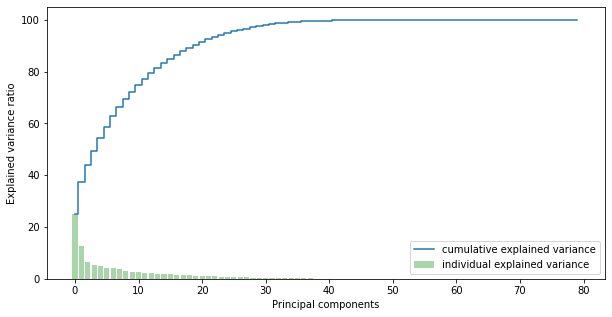

In [9]:
X_std = StandardScaler().fit_transform(df)
plot_explained_variance(X_std)

# We can see with some linear combinations between columns, we can get more than 90% of the info with 20 features and with 40 features we can get more than 98% of info which means that there is a lot of Correlation in our data and there is some features that hold 0% of data and in our case we can see that there is many features with only zero values which is also represented in the Below table for Pearson Correlation for our features

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

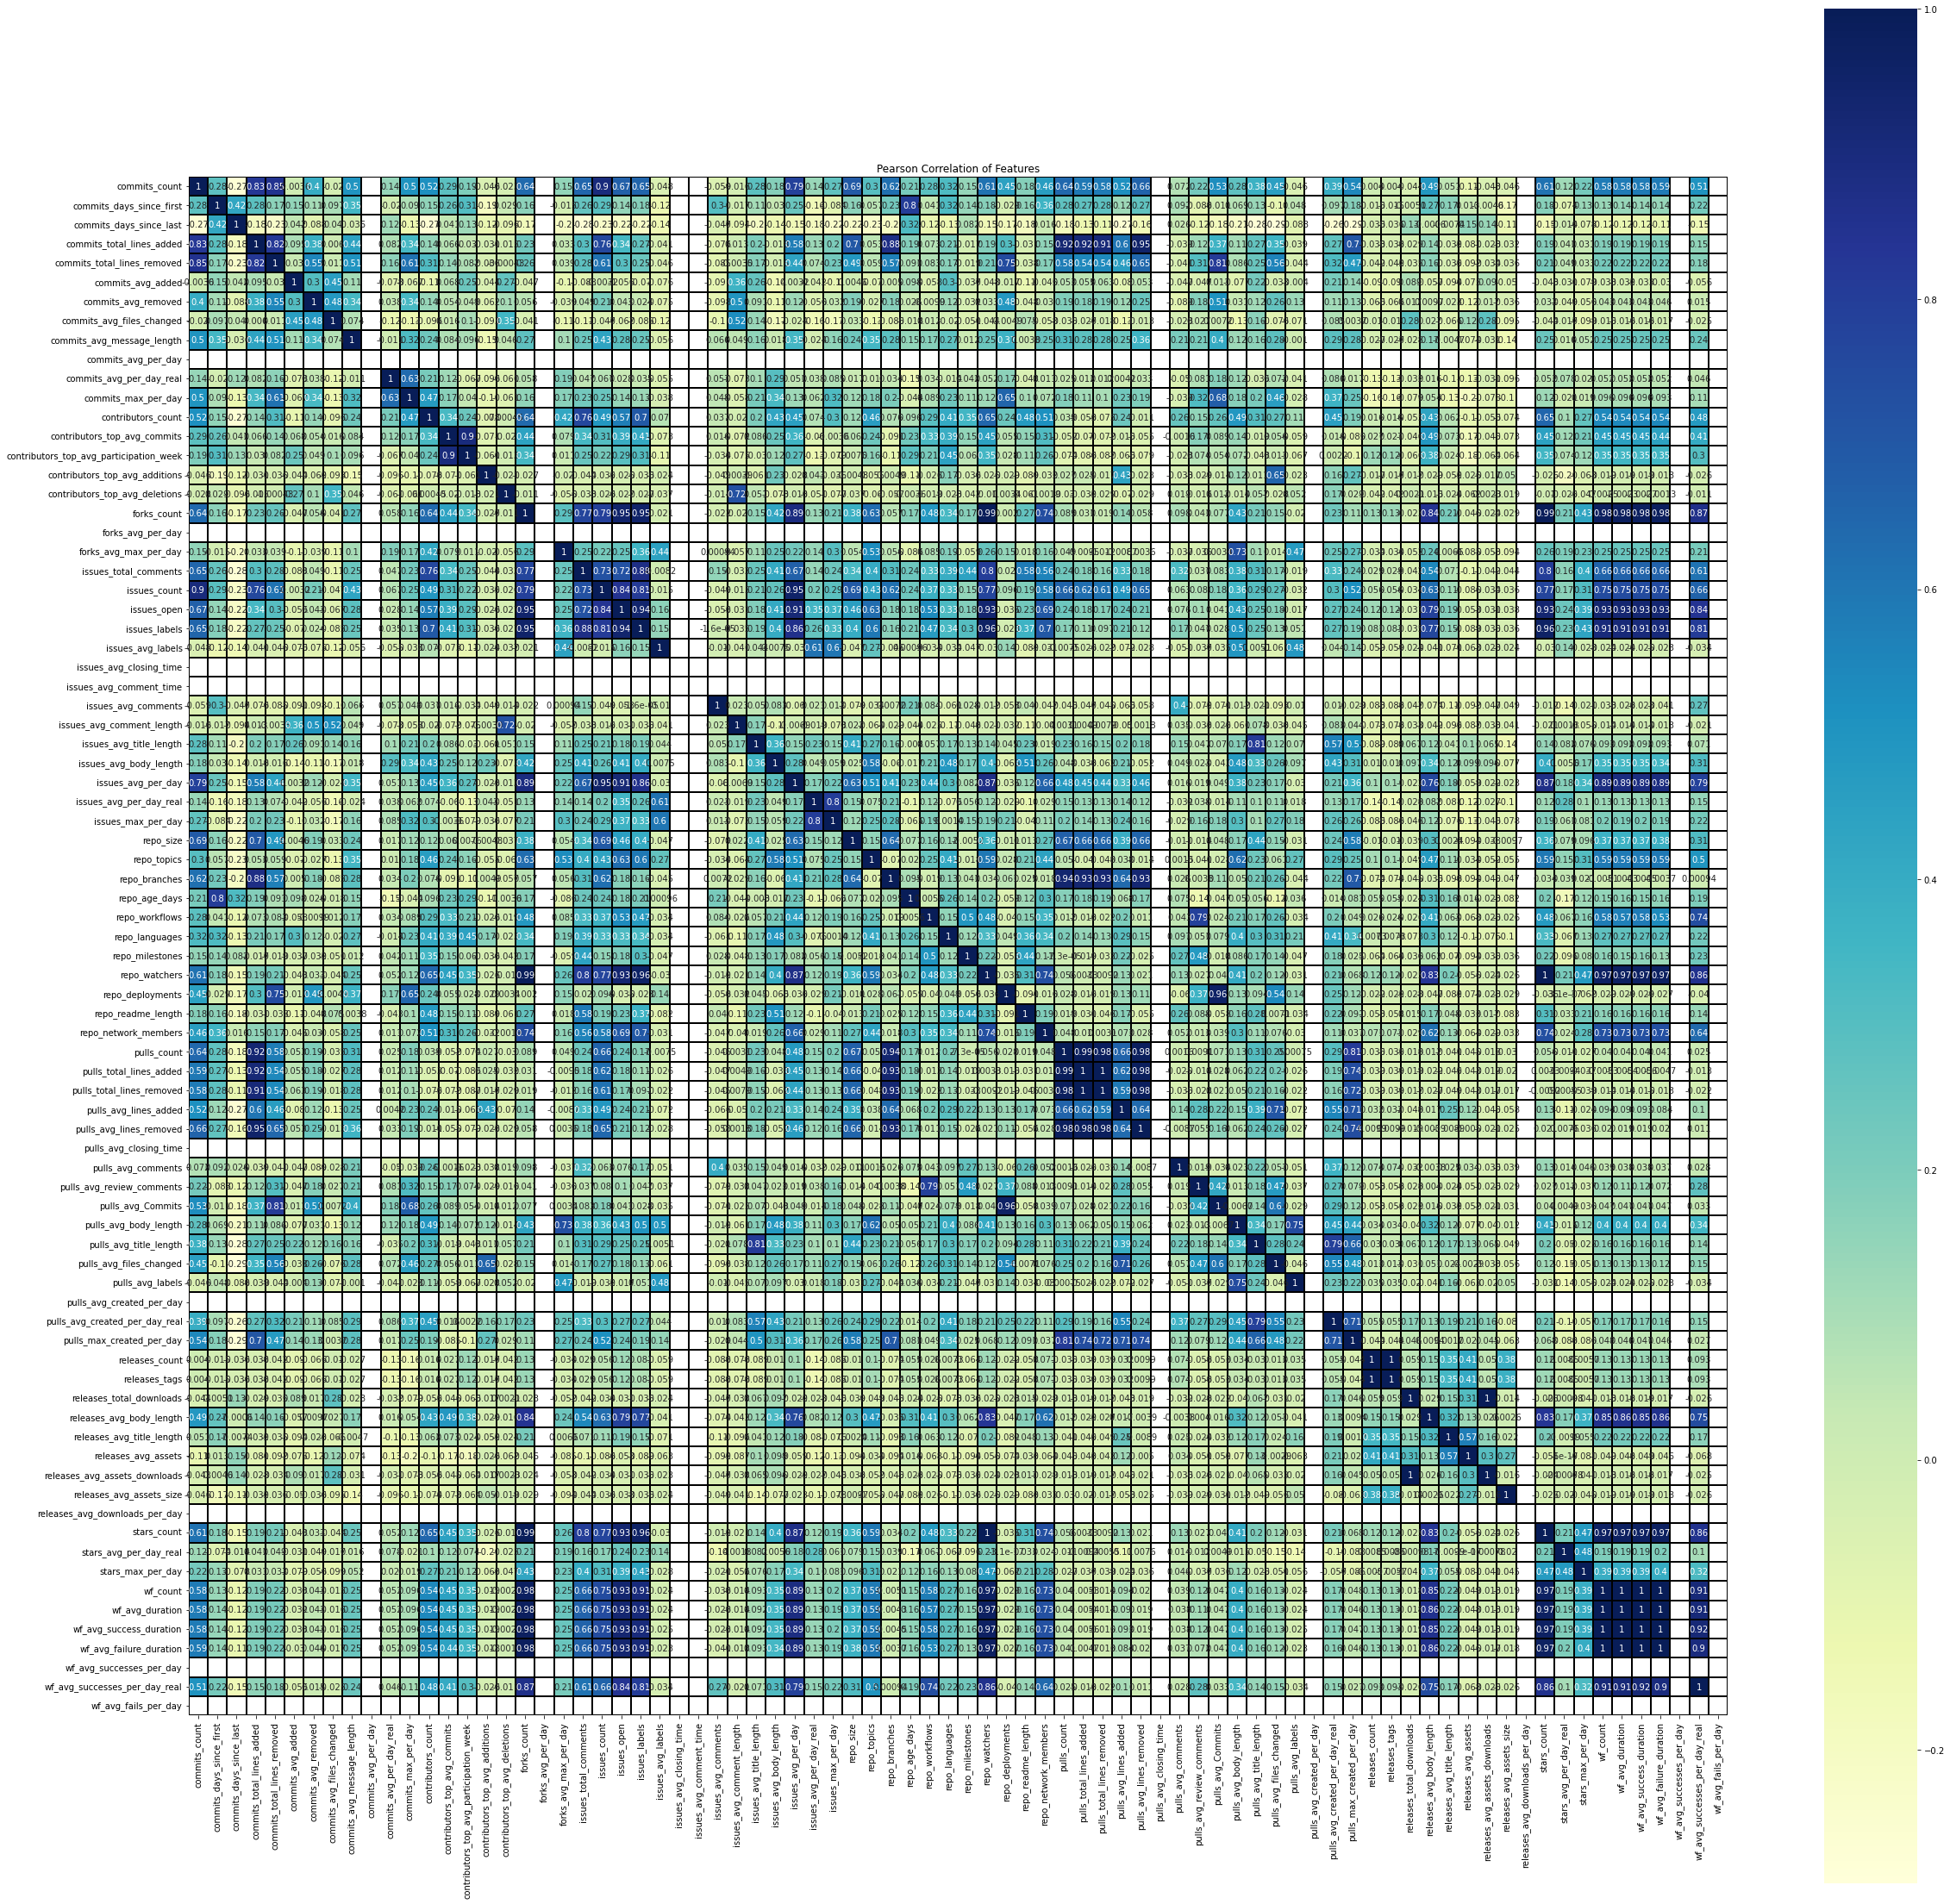

In [10]:
f, ax = plt.subplots(figsize=(40,40))
plt.title('Pearson Correlation of Features')
sns.heatmap(df.astype(float).corr(), linewidths=0.25, vmax=1.0, square=True,
           cmap="YlGnBu", linecolor='black', annot=True)

# From the distribution charts for each feature below we can see that the zero values makes a bias to zero for many distributions and also some of the distributions have no info at all because some of the features has only zero values and we can see some distributions tends to be normal.

C:\Users\Alaa Aldin Hajjar\AppData\Local\Temp\ipykernel_9956\989221675.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

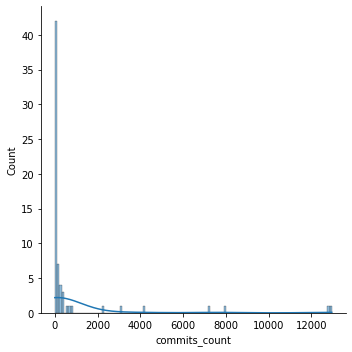

<Figure size 432x288 with 0 Axes>

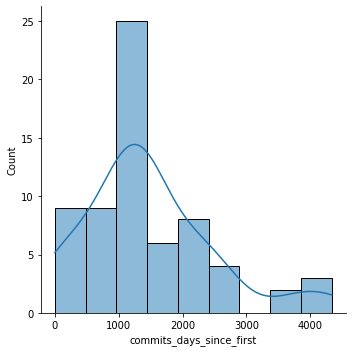

<Figure size 432x288 with 0 Axes>

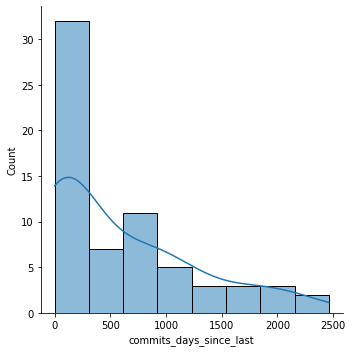

<Figure size 432x288 with 0 Axes>

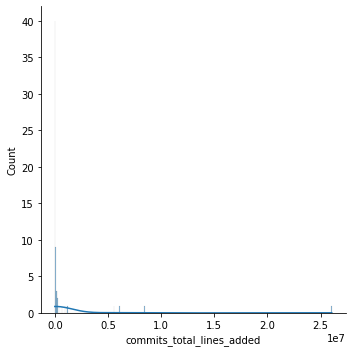

<Figure size 432x288 with 0 Axes>

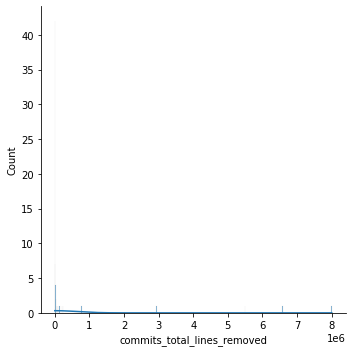

<Figure size 432x288 with 0 Axes>

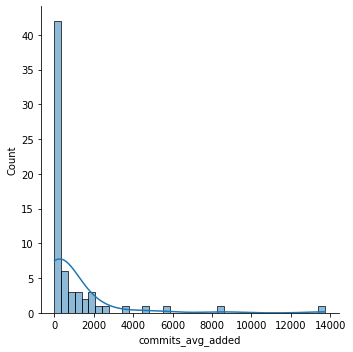

<Figure size 432x288 with 0 Axes>

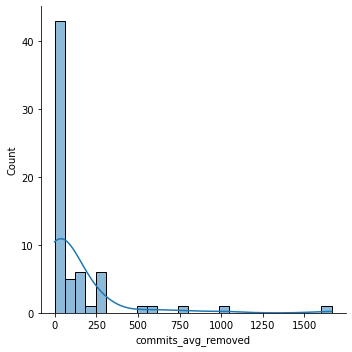

<Figure size 432x288 with 0 Axes>

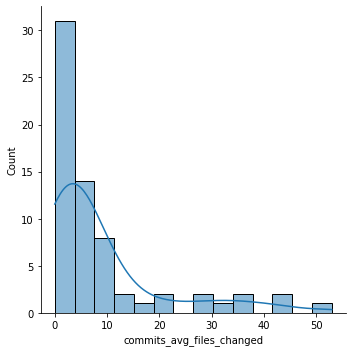

<Figure size 432x288 with 0 Axes>

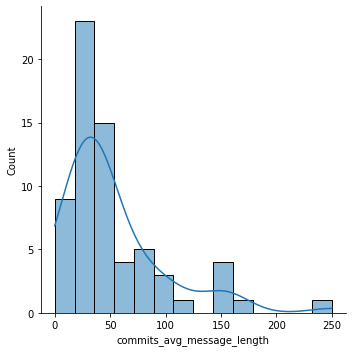

<Figure size 432x288 with 0 Axes>

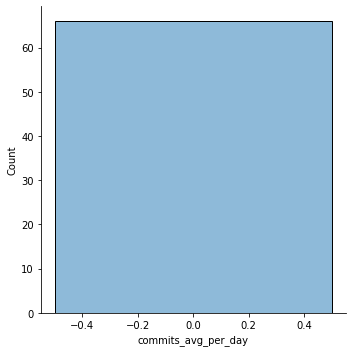

<Figure size 432x288 with 0 Axes>

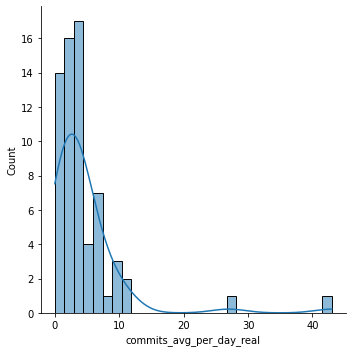

<Figure size 432x288 with 0 Axes>

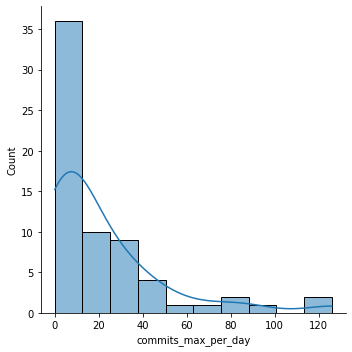

<Figure size 432x288 with 0 Axes>

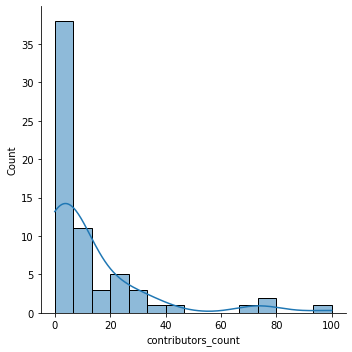

<Figure size 432x288 with 0 Axes>

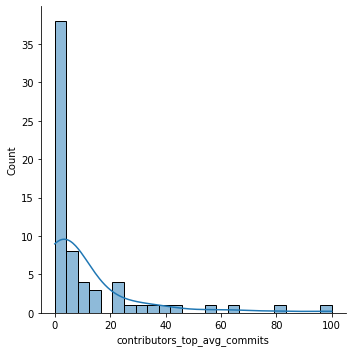

<Figure size 432x288 with 0 Axes>

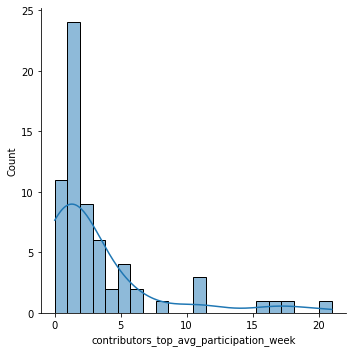

<Figure size 432x288 with 0 Axes>

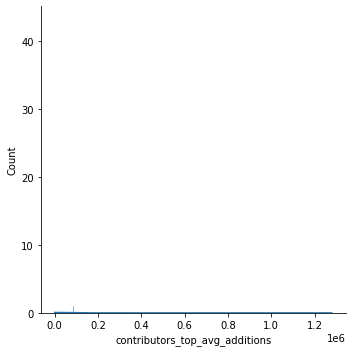

<Figure size 432x288 with 0 Axes>

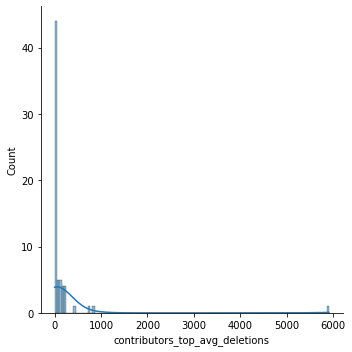

<Figure size 432x288 with 0 Axes>

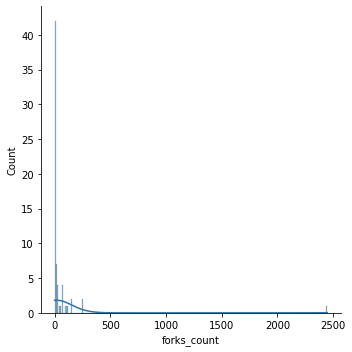

<Figure size 432x288 with 0 Axes>

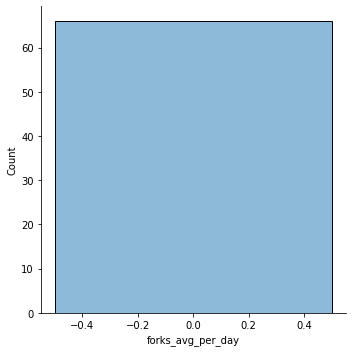

<Figure size 432x288 with 0 Axes>

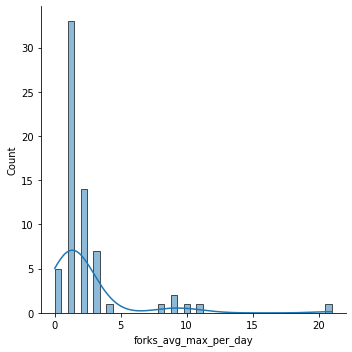

<Figure size 432x288 with 0 Axes>

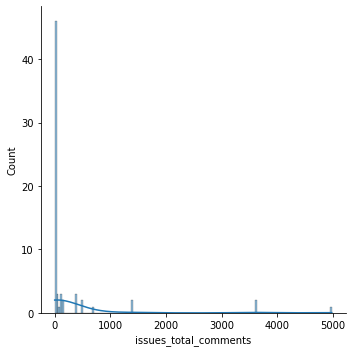

<Figure size 432x288 with 0 Axes>

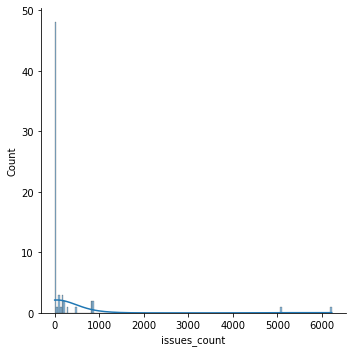

<Figure size 432x288 with 0 Axes>

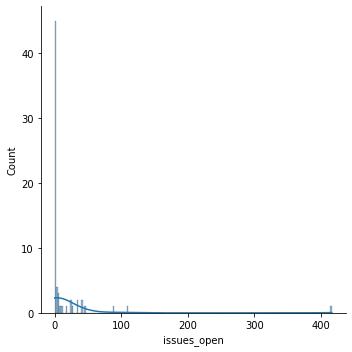

<Figure size 432x288 with 0 Axes>

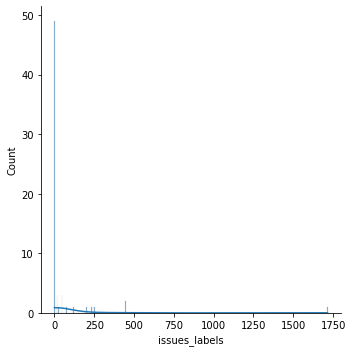

<Figure size 432x288 with 0 Axes>

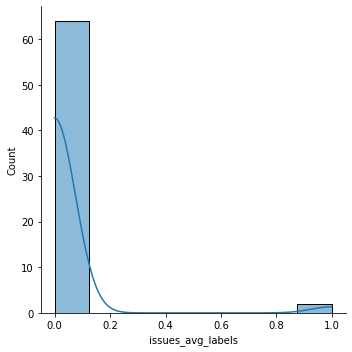

<Figure size 432x288 with 0 Axes>

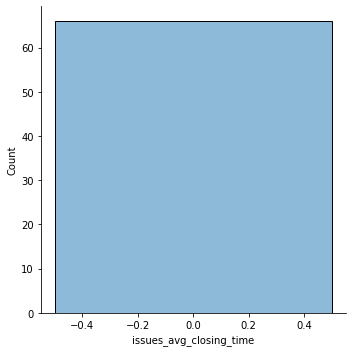

<Figure size 432x288 with 0 Axes>

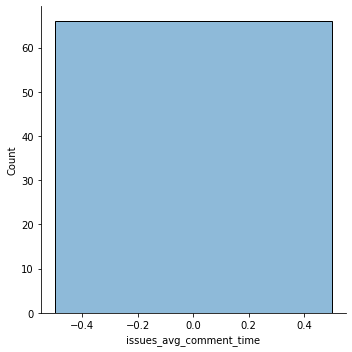

<Figure size 432x288 with 0 Axes>

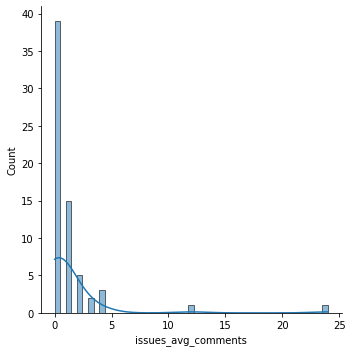

<Figure size 432x288 with 0 Axes>

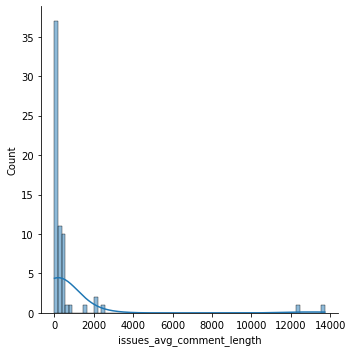

<Figure size 432x288 with 0 Axes>

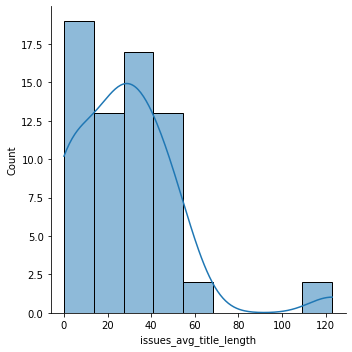

<Figure size 432x288 with 0 Axes>

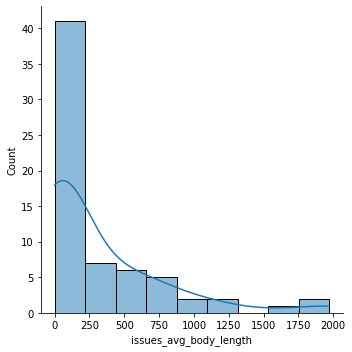

<Figure size 432x288 with 0 Axes>

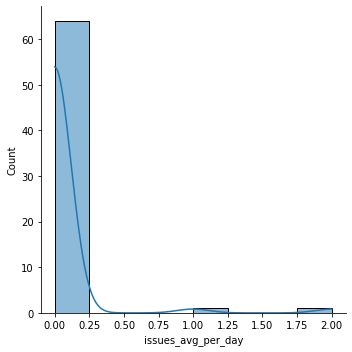

<Figure size 432x288 with 0 Axes>

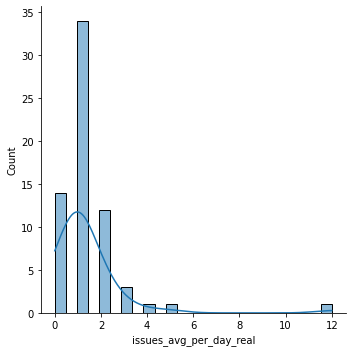

<Figure size 432x288 with 0 Axes>

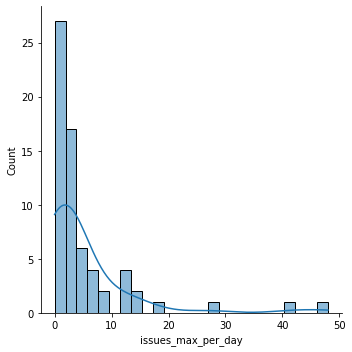

<Figure size 432x288 with 0 Axes>

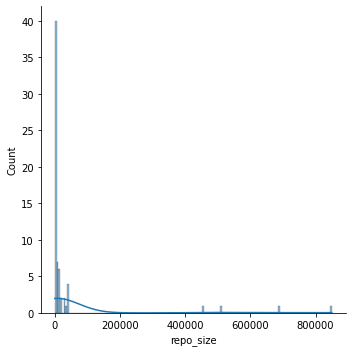

<Figure size 432x288 with 0 Axes>

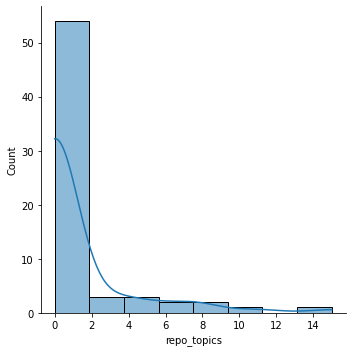

<Figure size 432x288 with 0 Axes>

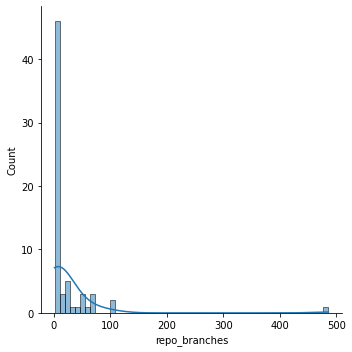

<Figure size 432x288 with 0 Axes>

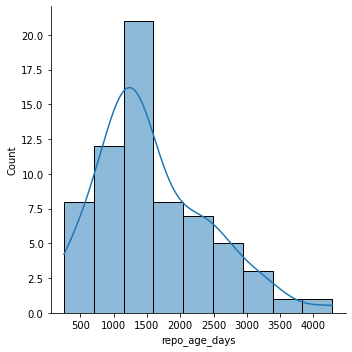

<Figure size 432x288 with 0 Axes>

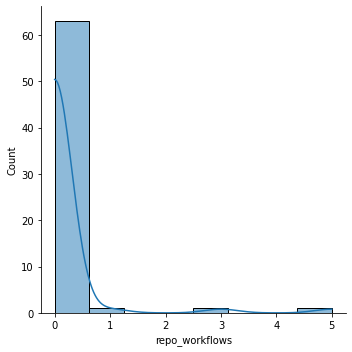

<Figure size 432x288 with 0 Axes>

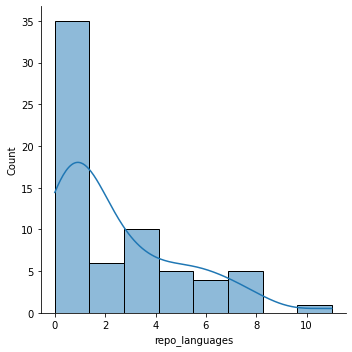

<Figure size 432x288 with 0 Axes>

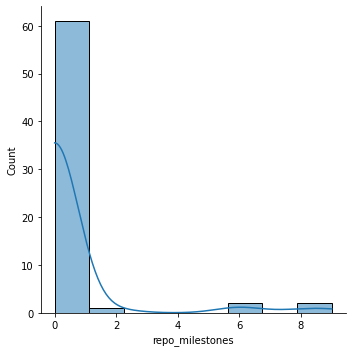

<Figure size 432x288 with 0 Axes>

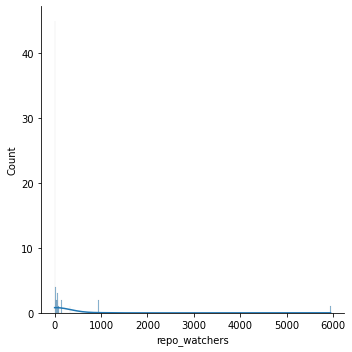

<Figure size 432x288 with 0 Axes>

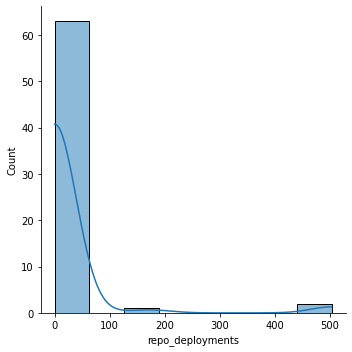

<Figure size 432x288 with 0 Axes>

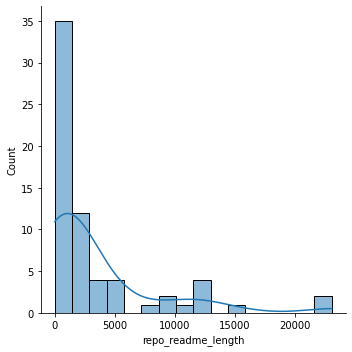

<Figure size 432x288 with 0 Axes>

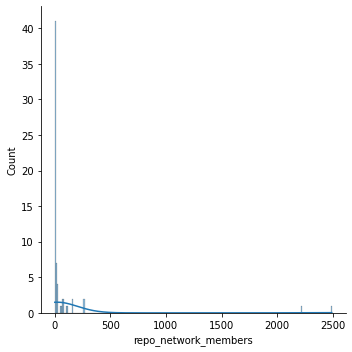

<Figure size 432x288 with 0 Axes>

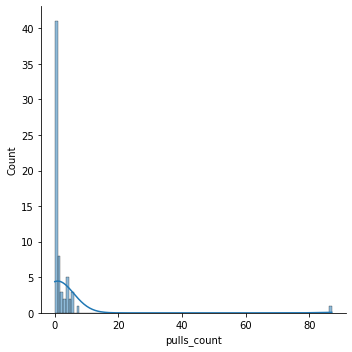

<Figure size 432x288 with 0 Axes>

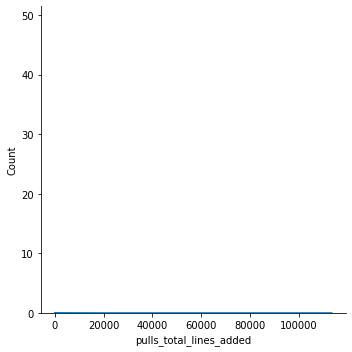

<Figure size 432x288 with 0 Axes>

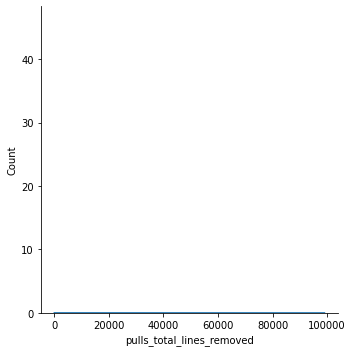

<Figure size 432x288 with 0 Axes>

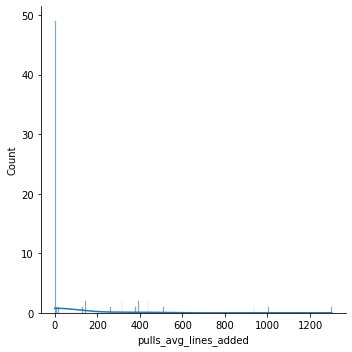

<Figure size 432x288 with 0 Axes>

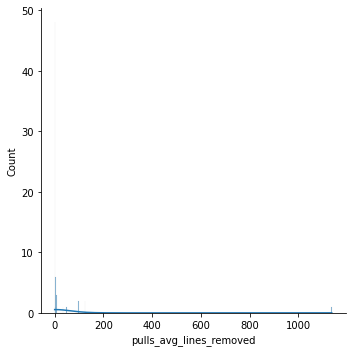

<Figure size 432x288 with 0 Axes>

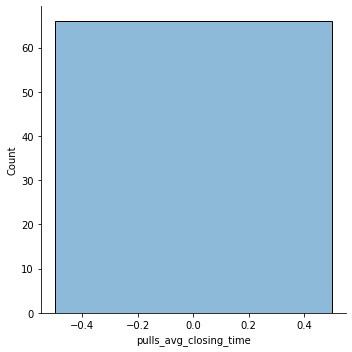

<Figure size 432x288 with 0 Axes>

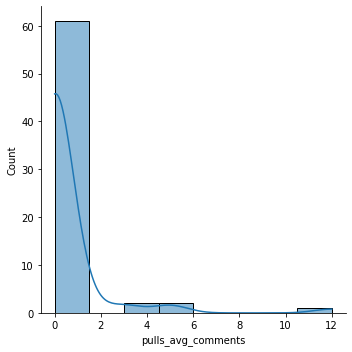

<Figure size 432x288 with 0 Axes>

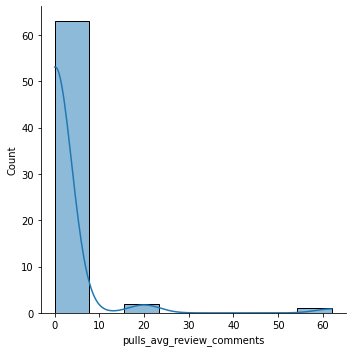

<Figure size 432x288 with 0 Axes>

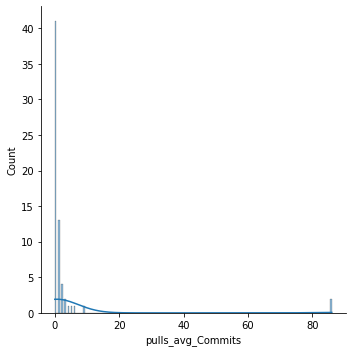

<Figure size 432x288 with 0 Axes>

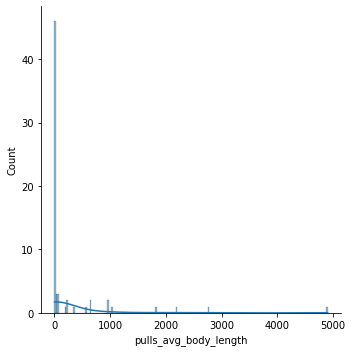

<Figure size 432x288 with 0 Axes>

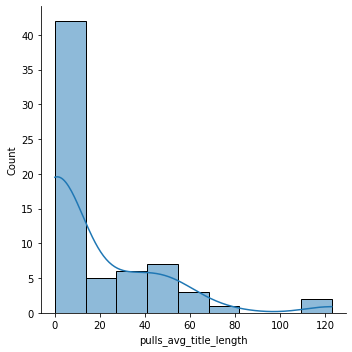

<Figure size 432x288 with 0 Axes>

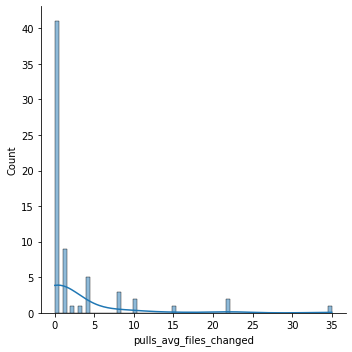

<Figure size 432x288 with 0 Axes>

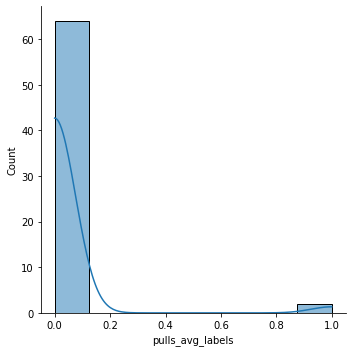

<Figure size 432x288 with 0 Axes>

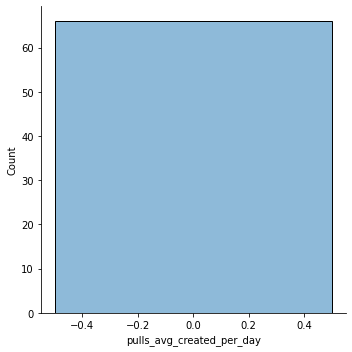

<Figure size 432x288 with 0 Axes>

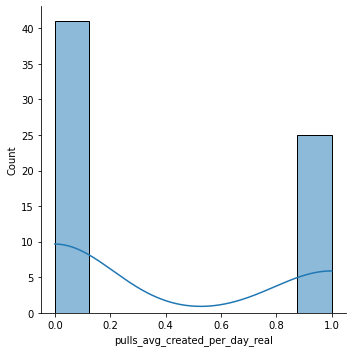

<Figure size 432x288 with 0 Axes>

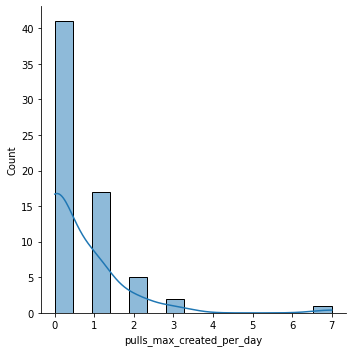

<Figure size 432x288 with 0 Axes>

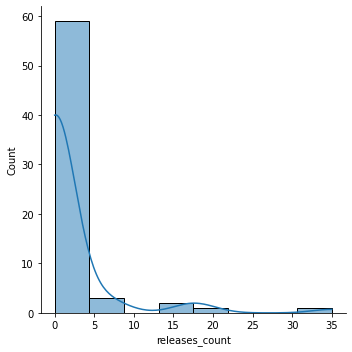

<Figure size 432x288 with 0 Axes>

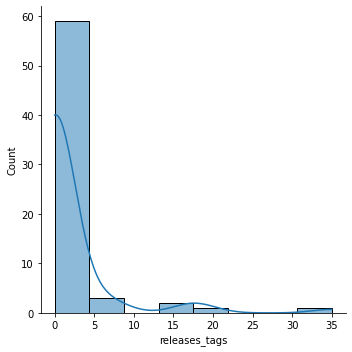

<Figure size 432x288 with 0 Axes>

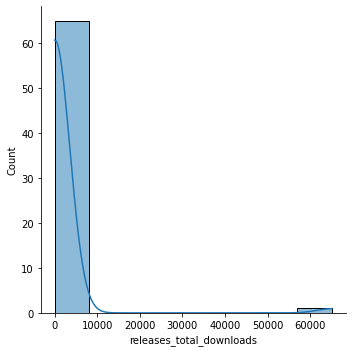

<Figure size 432x288 with 0 Axes>

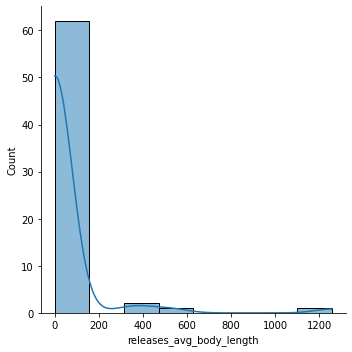

<Figure size 432x288 with 0 Axes>

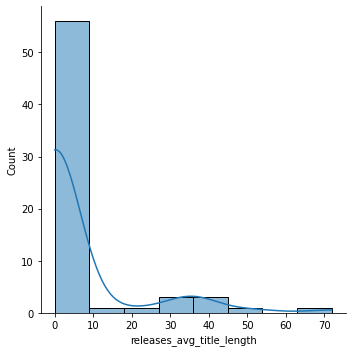

<Figure size 432x288 with 0 Axes>

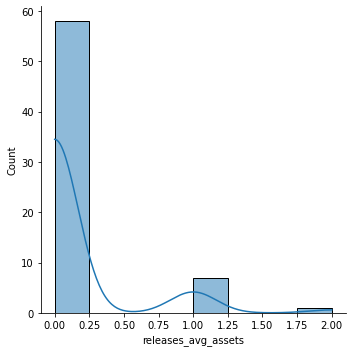

<Figure size 432x288 with 0 Axes>

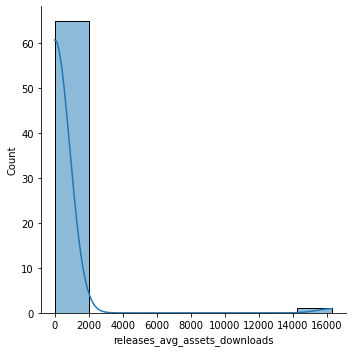

<Figure size 432x288 with 0 Axes>

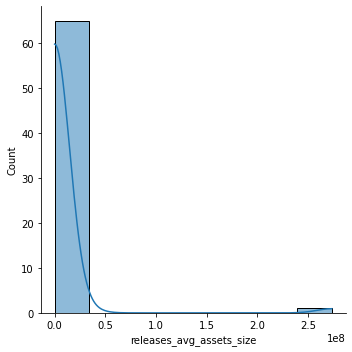

<Figure size 432x288 with 0 Axes>

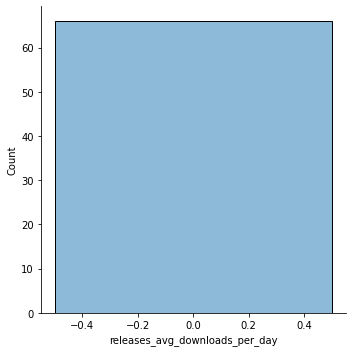

<Figure size 432x288 with 0 Axes>

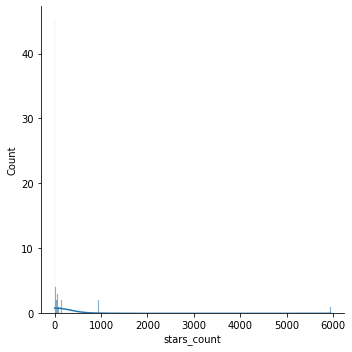

<Figure size 432x288 with 0 Axes>

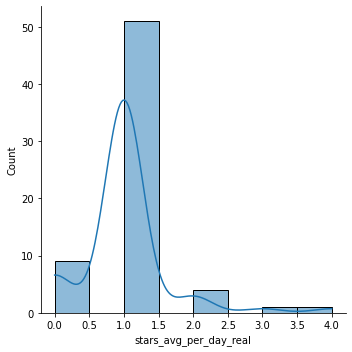

<Figure size 432x288 with 0 Axes>

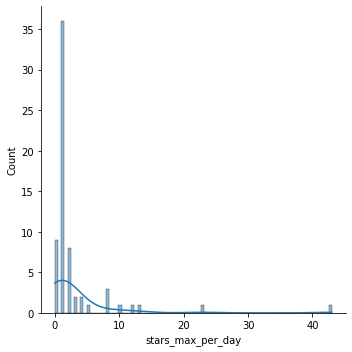

<Figure size 432x288 with 0 Axes>

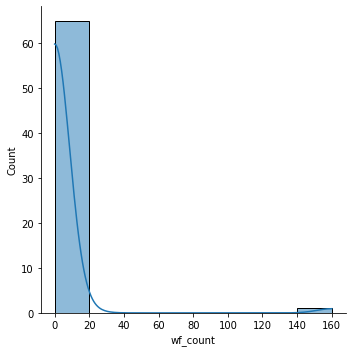

<Figure size 432x288 with 0 Axes>

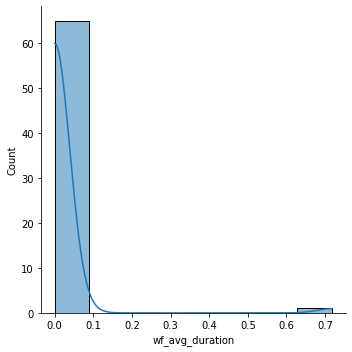

<Figure size 432x288 with 0 Axes>

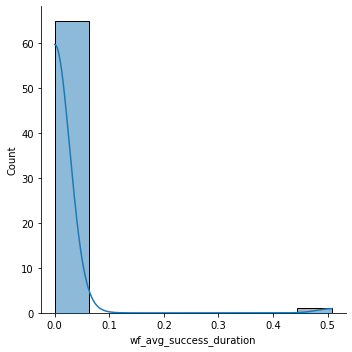

<Figure size 432x288 with 0 Axes>

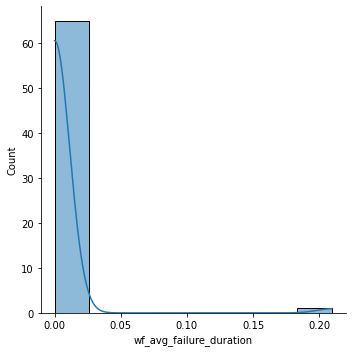

<Figure size 432x288 with 0 Axes>

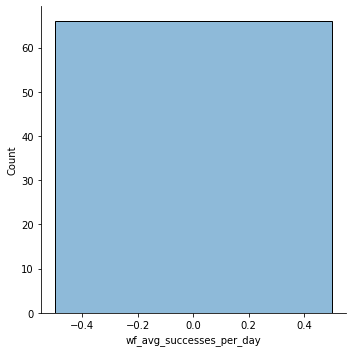

<Figure size 432x288 with 0 Axes>

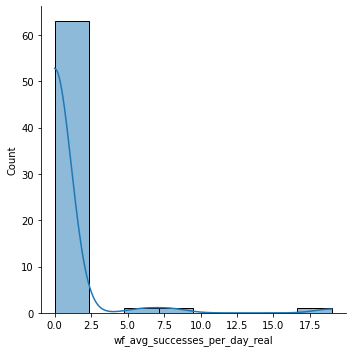

<Figure size 432x288 with 0 Axes>

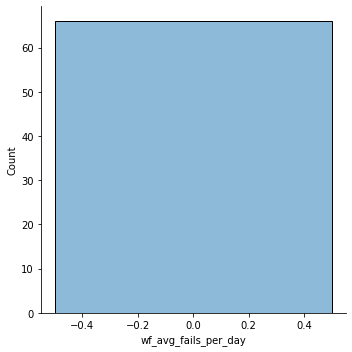

In [12]:


for column in df.columns:
    plt.figure()             
    sns.displot(df[column],kde=True)

In [13]:
from sklearn.model_selection import train_test_split

df1, df2 = train_test_split(df, test_size=0.5)

In [14]:
from scipy import stats
KS=[]
for column in df.columns:
    KS.append(stats.ks_2samp(df1[column], df2[column]))

In [29]:
KS[0]

KstestResult(statistic=0.15151515151515152, pvalue=0.851010941578351)

# Using Kolmogorov-Smirnov two-tailed test to see what is the alpha value that we need to say that the feature has more than one distribution inside.

In [28]:
columns=df.columns
for i,ks in enumerate(KS):
    print(columns[i]+" will have more than one dist inside it if we take alpha more or equal than: "+str(ks[1]))

commits_count will have more than one dist inside it if we take alpha more or equal than: 0.851010941578351
commits_days_since_first will have more than one dist inside it if we take alpha more or equal than: 0.6543432845812748
commits_days_since_last will have more than one dist inside it if we take alpha more or equal than: 0.1729142542609664
commits_total_lines_added will have more than one dist inside it if we take alpha more or equal than: 0.45349473522704375
commits_total_lines_removed will have more than one dist inside it if we take alpha more or equal than: 0.6543432845812748
commits_avg_added will have more than one dist inside it if we take alpha more or equal than: 0.6543432845812748
commits_avg_removed will have more than one dist inside it if we take alpha more or equal than: 0.6543432845812748
commits_avg_files_changed will have more than one dist inside it if we take alpha more or equal than: 0.851010941578351
commits_avg_message_length will have more than one dist insi

In [30]:
df.insert(0,'repo_fullname',repo_fullname)